In [2]:
import numpy
import cPickle as pic
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
allele_dict = pic.load(open("data/allele_dic_with_WT.pkl", "rb"))
translate = pic.load(open("data/translate.pkl", 'rb'))
amino2number = pic.load(open("data/aminotonumber.pkl", 'rb'))

def calc_hammingdist(s1, s2):
    """
    Calculates hamming distance between two strings of the same length
    """
    assert len(s1) == len(s2)
    
    d = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            d += 1
    return d


In [3]:
print(allele_dict)
print(translate)
print(amino2number)

{'CCCCTCCCACGGAAGACT': (43, 'TCG'), 'TGGGGTCTGTTGTGGTCA': (62, 'TAA'), 'CGTATCCTTACATTTACT': (7, 'ACA'), 'ATCGTCTGCTTCCACTGT': (12, 'TCG'), 'CCCAGCTGTCATAGTACG': (68, 'TAG'), 'GTGACGAGCCAGTATTAT': (10, 'GGG'), 'CGGTGACGAGGCCGCATA': (43, 'TAG'), 'TCCTCACGAGACCGTTAT': (28, 'GTT'), 'GTAAGCCCTACTAACTTT': (24, 'CGA'), 'AGCAGATTAGTGTTATAA': (8, 'CCC'), 'AGTCTCGGGGGGGACGGC': (41, 'GGC'), 'CCAGAGACCTTCGAGTAA': (70, 'CTT'), 'GGTGGCTCAGAATGGGTT': (36, 'GGG'), 'TCAGGGGGTCAAGCGTCC': (26, 'AGG'), 'GACGTGGCGTAACACGAT': (24, 'GAT'), 'TACCGTGAAAAAAGTCTA': (7, 'CCC'), 'GCGCGCGCCTGGCGGCGA': (73, 'GCG'), 'CATATTGAAAATGTTTAT': (75, 'CCA'), 'CGATCTCGCGCAATACAA': (62, 'AGT'), 'GGATGCCTCCCGGCTCGA': (42, 'CCC'), 'CAGAGGGTGGCTGACAGC': (34, 'CGG'), 'CGCAACTAGACTGCTTAC': (35, 'CAA'), 'TGTCTATGTTATATCGCG': (0, 'WT'), 'CTGGAGACGCCCCAAGAG': (74, 'TTC'), 'GTCTCGCACTTTATAGGA': (31, 'TTG'), 'TAGGCCCATCTGGAGTCG': (20, 'AGT'), 'ATCGAGAGGACGGAGTGT': (71, 'TTT'), 'TGCCTTAAACGCGGCTCT': (72, 'GCT'), 'GAAGTGTAACCATTACTC': (2

In [4]:
#Create a dictionary of barcodes to count the frequency
barcodes = {}

# I want to see how many barcodes we're dealing with
print(len(allele_dict.keys()))

#iterate over all keys in the allele_dict dictionary, and add to barcodes appropriately
for k in allele_dict.keys():
    if barcodes.has_key(k):
        barcodes[k] += 1
    else:
        barcodes[k] = 1

31485


In [5]:
# I created an array of edges (represented as tuples) between barcoedes that are a hamming distance of 1 away
barcode_hd = pic.load(open("barcode_hammingdist.pkl", "rb"))

In [6]:
# Just a sanity check
print(len(barcode_hd))

1719


/usr/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


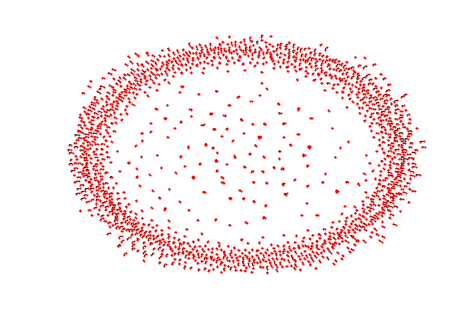

In [8]:
# Create a networkx graph to plot and operate on 
G = nx.Graph()
# Add the edges (tuples) from the pickle file read in above
G.add_edges_from(barcode_hd)
# nx.draw is a function to draw the network, directly integrated with matplotlib
nx.draw(G, node_size=1)
plt.savefig("bchamming_graph.png")
plt.show()

[0, 2742, 300, 25, 4, 1]


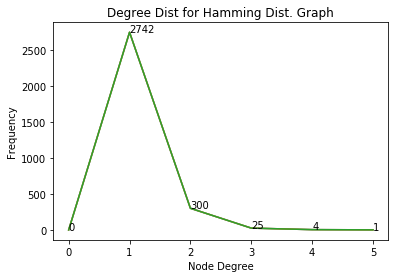

In [12]:
# We can quickly find the degree distribution for this graph

# this function gives us a dictionary, where each key is a node and the value is its degree (connectivity)
d = nx.degree(G)

# now just create a simple array and get the frequency for each degree in the graph
degree_dist = [0]*6
for bc in d.keys():
    deg = d[bc]
    degree_dist[deg] += 1
print(degree_dist)
x = [0,1,2,3,4,5]

# Normal matplotlib functions to create a dist plot
plt.plot([0,1,2,3,4,5], degree_dist)
plt.title("Degree Dist for Hamming Dist. Graph")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")

for i, txt in enumerate(degree_dist):
    plt.annotate(txt, (x[i], degree_dist[i]))

plt.savefig("degree_dist_hammingdistgraph.png")
plt.show()